# Titanic - Kaggle Competition


### Introduction

The titanic was one of the world's greatest tragedies as well as one of the most unexpected ones, as the ship - the biggest in the world at the time, and widely regarded as "unsinkable" - has sunk on the first voyage after hitting an iceberg. Most of the 2200 passengers did not survive the accident. Our analysis tries to explore, using the available information, "who" survived - that is, what characteristics determined if a passenger will get a seat on a lifeboat or not. It it status, is it sex, is it age, is it all of it and more? Or was it all mere luck?

##### Target audience
Although nothing can be done for the victims of the titanic anymore, the tragedy is worth exploring in order to understand human behaviour in critical situations. Social Study scholars may want to explore how does one decide which life is worth saving, or in other words, how is the value of the life measured (at least how it was back in the days of the titanic). It is the case that in life and death situations, all lives are equal? Or is it the case that some lives are valued more than others, and if so, what determines how?

### Data

For the purpose of this analysis, the dataset provided by Kaggle will be used. The data on the approximately 1300 passengers is already split into training and testing subsets. Below is a quick overview of the data structure:

In [1]:
import pandas as pd
train = pd.read_csv("https://raw.githubusercontent.com/LucianChiriac/Coursera_Capstone/master/titanic_datasets/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/LucianChiriac/Coursera_Capstone/master/titanic_datasets/test.csv")
train.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

##### PassengerId
a unique identifier for each passenger
##### Survived 
takes values 0 for "not survived" and 1 for "survived"
##### Pclass 
the class a passenger was travelling in, with values 1 to 3 (1 being first class, "the highest", and 3 being third class)
##### Name
unique name value for each passenger
##### Sex 
indicates wether passenger is "male" or "female"
##### Age 
numerical column indicating the age of a passenger in years
##### SibSp 
number of Siblings/Spouses acommpanying a passenger on board
##### Parch 
number of Parents/Children accompanying a passenger on board
##### Ticket 
Ticket number
##### Fare 
amount in dollars that was paid for the ticket
##### Cabin 
the cabin number allocated to a passenger
##### Embarked 
three values - C,Q,S indicating where the passenger has embarked from (Cherbourg, Queenstown, Southampton)
#### In the following section each variable, as well as the interactions between them will be explored in more detail.

### EDA - Exploratory Data Analysis

In this section we will look more closely at each variable as well as the interactions within them. We will also apply some feature engineering, in order to extract some more information out of the available data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

At a first look, it can be noticed that the 'Age' column is missing over a hundred values, whereas the Cabin column seems to be missing most of the variables.
Before moving on to analysing each variable in turn, let's take a look at the correlation matrix, to see what linear relationships exist between variables. To be able to do so, we will perform a small amount of feature engineering first, more precisely on the Embarked and Sex variables.


In [5]:
from sklearn.preprocessing import LabelEncoder
train_copy = train.copy()
label = LabelEncoder()
## Now we take the columns of interest, label encode their values, and assign them to new columns
train_copy['Sex_cat'] = label.fit_transform(train_copy['Sex'])
## The Embarked column has 2 missing values; for simplicity, we will fill those values in with the most common value - S
train_copy['Embarked'].fillna("S", inplace=True)
train_copy['Embarked_cat'] = label.fit_transform(train_copy['Embarked'])

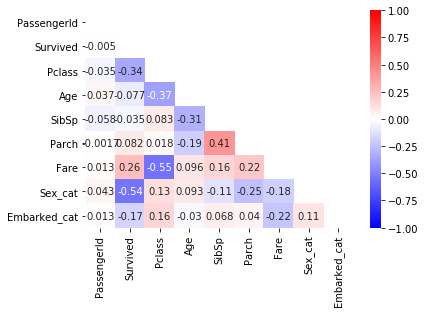

In [6]:
corrm = train_copy.corr()
mask = np.triu(corrm)
sns.heatmap(corrm, mask=mask, vmin = -1, vmax = 1, center = 0, annot = True, cmap = 'bwr', fmt = '.2g')

It can be observed that the dependent variable - Survived, is most correlated with Sex, Pclass and Fare, as well as the port of embarking. It is worth nothing though that the correlation matrix only tracks linear relationships; as such, we must explore the variables further in order to decide which ones can be used in the analysis.

#### PassengerId

In [7]:
print("There are {} entries in the PassengerID column.".format(len(train)))
print("There are {} unique PassengerId values.".format(len(set(train.PassengerId))))
print(train.PassengerId.describe())

There are 891 entries in the PassengerID column.
There are 891 unique PassengerId values.
count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64


Each passenger is assigned a unique ID, which has numerical values ranging from 1 to 891. These column is therefore unlikely to provide any information, and cannot be fed into the algorithms. For the Algorithm training phase, this column will pe dropped.

#### Survived

In [8]:
train.Survived.value_counts(dropna=False, normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

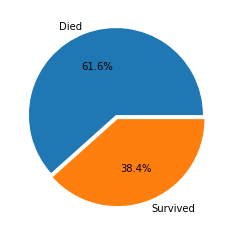

In [9]:
fig = plt.figure(figsize=(4,4))
plt.pie(train.Survived.value_counts(),labels=['Died','Survived'], explode=[0,0.05], autopct="%1.1f%%")
plt.show()

It seems that only 38% of the passengers on the training set survived. A naive prediction model would predict "Dead" for all passengers, and obtain a 61% accuracy. Our goal is to see if we can use the information from the other variables to improve in this %.

#### Pclass

In [10]:
train.Pclass.value_counts(dropna = False, normalize = True).sort_index()

1    0.242424
2    0.206510
3    0.551066
Name: Pclass, dtype: float64

In [11]:
table = pd.pivot_table(data=train, index="Pclass", values=["Survived", "PassengerId"], aggfunc={"Survived":np.mean, "PassengerId":'count'})
table.rename(columns={"PassengerId":"Total passengers"}, inplace=True)
table

Total passengers  Survived
Pclass                            
1                    216  0.629630
2                    184  0.472826
3                    491  0.242363

Text(0.5, 0.98, 'Survival by Pclass')

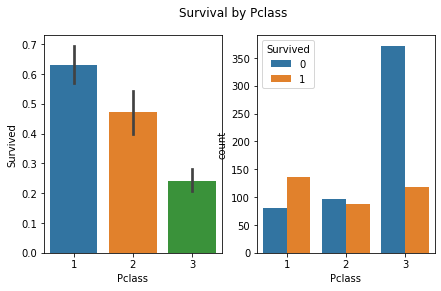

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(7,4))

sns.barplot(x="Pclass", y='Survived', data=train, ax=ax[0])
sns.countplot(x="Pclass", hue='Survived', data=train, ax=ax[1])
plt.suptitle("Survival by Pclass")

It is quite clear that the Class variable plays an important role in predicting if a passenger survives or not, with higher classes having higher survival chances. For example - 63% of the first class passengers survived, whereas only 24% of 3rd class ones did. This seems to suggest richer, "higher class" passengers were prioritized over poorer ones.

#### Name

In [13]:
print("There are {} unique names.".format(len(set(train.Name))))
print(train.Name.head())

There are 891 unique names.
0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object


Each passenger has a unique name associated, as expected, so the Name column as it is, cannot be used in our algorithms. However, looking at the data it seems that every Name also has a title associated with it (example: Mr, Ms, Mrs). Perhaps the titles alone do play a role. We will apply some feature engineering to extract the titles and add them to a new column.

In [14]:
train["Title"] = train["Name"].str.extract(r", ([^\s]+) ") # extracts all the words following a comma+space, up to but not including a space
titles = train['Title'].value_counts()
print(titles)

test['Title'] = test['Name'].str.extract(r", ([^\s]+) ")
titles_test = test['Title'].value_counts()
print(titles_test)

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Major.         2
Mlle.          2
Don.           1
Sir.           1
Ms.            1
Jonkheer.      1
the            1
Lady.          1
Capt.          1
Mme.           1
Name: Title, dtype: int64
Mr.        240
Miss.       78
Mrs.        72
Master.     21
Rev.         2
Col.         2
Dona.        1
Ms.          1
Dr.          1
Name: Title, dtype: int64


In [15]:
keepers = titles[:4].index # We only keep the most common titles. The rest we group under "other"
keepers_test = titles_test[:4].index
train["Title"][~train["Title"].isin(keepers)] = "other"
test["Title"][~test["Title"].isin(keepers_test)] = 'other'
print(train["Title"].value_counts())
print(test['Title'].value_counts())


Mr.        517
Miss.      182
Mrs.       125
Master.     40
other       27
Name: Title, dtype: int64
Mr.        240
Miss.       78
Mrs.        72
Master.     21
other        7
Name: Title, dtype: int64


H:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
H:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [16]:
table = pd.pivot_table(data=train, index=['Title'], values=['Survived', "PassengerId"], aggfunc = {"Survived":np.mean, "PassengerId":'count'})
table.rename(columns = {"PassengerId":"Total Passengers"})

Total Passengers  Survived
Title                              
Master.                40  0.575000
Miss.                 182  0.697802
Mr.                   517  0.156673
Mrs.                  125  0.792000
other                  27  0.444444

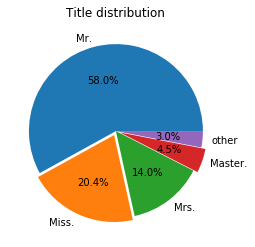

In [17]:
tit = train['Title'].value_counts().index
plt.pie(train['Title'].value_counts(), labels=tit, explode=[0,0.05,0,0.05,0], autopct="%1.1f%%")
plt.title("Title distribution")
plt.show()

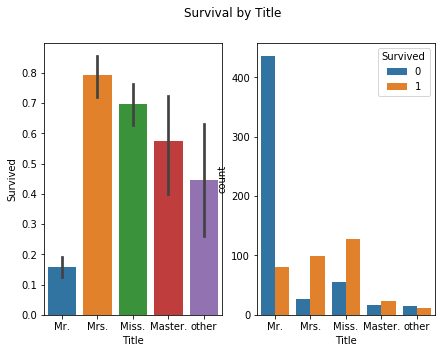

In [18]:
fig, ax = plt.subplots(1,2, figsize=(7,5))

sns.barplot(x="Title", y="Survived", data=train, ax=ax[0])
sns.countplot(x="Title", hue="Survived", data=train, ax=ax[1])
plt.suptitle("Survival by Title")
plt.show()

It seems that there is a clear correlation between title and survivability. At a first look it does seem that the split is actually between Men and Women, but there do seem to be some differences between the survival rates of differently titled females (Mrs. ms Miss).

#### Sex

In [19]:
train.Sex.value_counts(dropna=False, normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

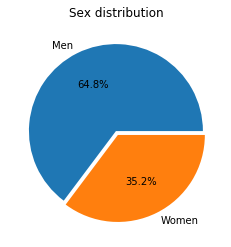

In [20]:
plt.pie(train['Sex'].value_counts(), explode=[0,0.05], labels=["Men", "Women"], autopct="%1.1f%%")
plt.title("Sex distribution")
plt.show()

In [21]:
table = pd.pivot_table(data=train, index="Sex", values=['Survived', 'PassengerId'], aggfunc={'Survived':'mean', 'PassengerId':'count'})
table.rename(columns={"PassengerId":'Total number'})

Total number  Survived
Sex                           
female           314  0.742038
male             577  0.188908

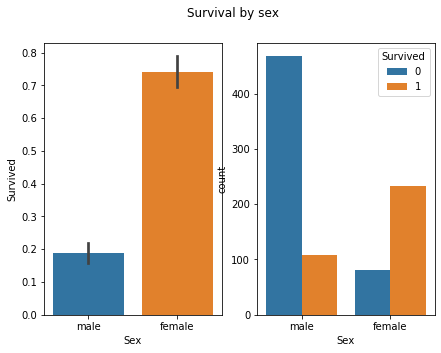

In [22]:
fig, ax = plt.subplots(1,2, figsize=(7,5))
sns.barplot(x="Sex", y="Survived",data=train,ax=ax[0])
sns.countplot(x="Sex", data=train, hue="Survived", ax=ax[1])
plt.suptitle("Survival by sex")
plt.show()

We notice 74% of the women did survive, whereas only 19 of the men did. Sex seems to be a hugely influential factor in determining wether a certain passenger will survive or not.

#### Age

In [23]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [24]:
train.Age.isnull().sum()

177

There are 177 missing values for age that we must deal with. One idea would be to check the age distribution according to title, and use that information to infer the missing values, the reasoning being that perhaps a certain title is indicative of age(example: Master for young boys, Miss for unmaried-  therefore (maybe) younger women)

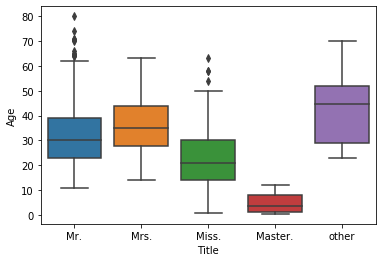

In [25]:
sns.boxplot(data=train, x="Title", y="Age")
plt.show()

In [26]:
train['Title'][train["Age"].isna()].value_counts()

Mr.        119
Miss.       36
Mrs.        17
Master.      4
other        1
Name: Title, dtype: int64

In [27]:
test['Title'][test["Age"].isna()].value_counts()

Mr.        57
Miss.      14
Mrs.       10
Master.     4
other       1
Name: Title, dtype: int64

The only clear distinction in Age range is for "Master", but there are signiffican interquartile range differences between the other groups too. As expected, Miss seem to be younger than Mrs. However, for most missing values the title corresponds to a Mr. We will use the median age of each of our ranges to impute the missing values.


In [28]:
piv = pd.pivot_table(data=train, index="Title", values=["Age"], aggfunc = np.median)
piv

Age
Title        
Master.   3.5
Miss.    21.0
Mr.      30.0
Mrs.     35.0
other    44.5

In [29]:
piv=piv['Age'].to_dict()

In [30]:
train["Age"] = train["Age"].fillna(train["Title"].map(piv))
test["Age"] = test["Age"].fillna(test["Title"].map(piv))

In [31]:
train.Age.isna().sum()

0

#### SibSp / Parch

In [32]:
train['SibSp'].value_counts(dropna=False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [33]:
train['Parch'].value_counts(dropna=False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

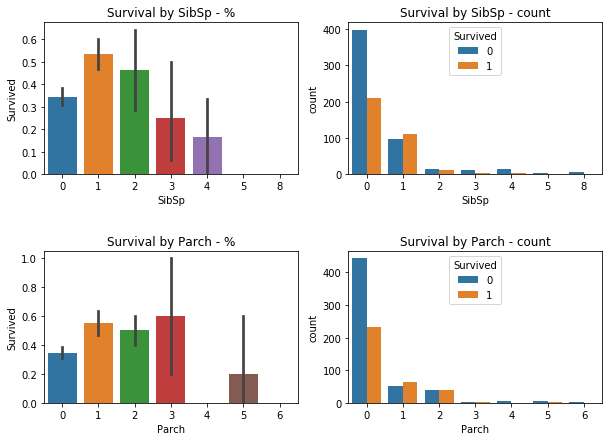

In [34]:
fig, ax = plt.subplots(2,2, figsize=(10,7))
sns.barplot(x="SibSp", y="Survived",data=train, ax=ax[0,0])
sns.countplot(data=train, x="SibSp", hue='Survived', ax=ax[0,1])
ax[0,0].set_title("Survival by SibSp - %")
ax[0,1].set_title("Survival by SibSp - count")

sns.barplot(x='Parch', y='Survived', data=train, ax = ax[1,0])
sns.countplot(x='Parch', hue='Survived', data=train, ax=ax[1,1])
ax[1,0].set_title("Survival by Parch - %")
ax[1,1].set_title("Survival by Parch - count")
plt.subplots_adjust(hspace=0.5)
plt.show()

In [35]:
piv = pd.pivot_table(data=train, index=['SibSp'], values=['Survived', 'PassengerId'], aggfunc={'Survived':np.mean, "PassengerId":'count'})
piv.rename(columns={"PassengerId":"Total Passengers"}, inplace=True)
piv

Total Passengers  Survived
SibSp                            
0                   608  0.345395
1                   209  0.535885
2                    28  0.464286
3                    16  0.250000
4                    18  0.166667
5                     5  0.000000
8                     7  0.000000

In [36]:
piv = pd.pivot_table(data=train, index=['Parch'], values=['Survived', 'PassengerId'], aggfunc={'Survived':np.mean, "PassengerId":'count'})
piv.rename(columns={"PassengerId":"Total Passengers"}, inplace=True)
piv

Total Passengers  Survived
Parch                            
0                   678  0.343658
1                   118  0.550847
2                    80  0.500000
3                     5  0.600000
4                     4  0.000000
5                     5  0.200000
6                     1  0.000000

It seems that most passengers were travelling alone (either without SibSp OR without Parch). For each category, there is an emerginf trend - those who had 1 or 2 travelling family with them had a higher survival chance. Having more than 2 family members translated into an even smaller survival rate - however the number of such cases was pretty small.

Let's create a new column - Family, as a sum between SibSp and Parch, to find out if the relationship changes overall.

In [37]:
train['Family'] = train['SibSp'] + train['Parch']
test['Family'] = test['SibSp'] + test['Parch']
train['Family'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

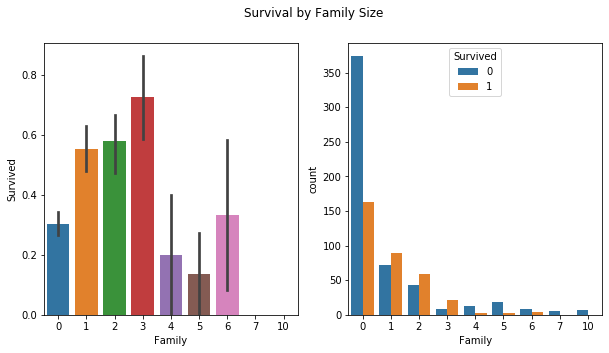

In [38]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.barplot(data=train, x="Family", y="Survived", ax=ax[0])
sns.countplot(data=train, x='Family', hue='Survived', ax=ax[1])
fig.suptitle("Survival by Family Size")
plt.show()

In [39]:
piv = pd.pivot_table(data=train, index="Family", values=['Survived', 'PassengerId'], aggfunc={"Survived":np.mean, "PassengerId":'count'})
piv.rename(columns={"PassengerId":"Total passengers"}, inplace = True)
piv

Total passengers  Survived
Family                            
0                    537  0.303538
1                    161  0.552795
2                    102  0.578431
3                     29  0.724138
4                     15  0.200000
5                     22  0.136364
6                     12  0.333333
7                      6  0.000000
10                     7  0.000000

The relationship discovered above holds for the new column, and extends to 3 family members as well. One strategy would be to group the passengers into 2 main categories: Alone / Not Alone. Alternatively, due to similarity in survival rates, we can group passengers travelling alone or with more than 3 family members into category 0, and the rest into category 1.
Let's test out the latter for now.

In [40]:
train["Family_cat"] = 0
train["Family_cat"] = [0 if x in [0,4,5,6,7,8,9,10] else 1 for x in train["Family"]]

test['Family_cat'] = 0
test['Family_cat'] = [0 if x in [0,4,5,6,7,8,9,10] else 1 for x in test["Family"]]

In [41]:
pivot = pd.pivot_table(data=train, index="Family_cat", values=["Survived", "PassengerId"], aggfunc = {"Survived":np.mean, "PassengerId":'count'})
pivot.rename(columns={"PassengerId":"Total Cases"}, inplace=True)
pivot

Total Cases  Survived
Family_cat                       
0                   599  0.288815
1                   292  0.578767

#### Ticket

In [42]:
train.Ticket.describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [43]:
tickets = train.Ticket.value_counts(ascending=False).head(5).index
train[train["Ticket"].isin(tickets)].sort_values(by="Ticket")

PassengerId  Survived  Pclass  \
169          170         0       3   
838          839         1       3   
826          827         0       3   
74            75         1       3   
509          510         1       3   
692          693         1       3   
643          644         1       3   
50            51         0       3   
824          825         0       3   
164          165         0       3   
686          687         0       3   
266          267         0       3   
638          639         0       3   
610          611         0       3   
13            14         0       3   
813          814         0       3   
542          543         0       3   
541          542         0       3   
119          120         0       3   
850          851         0       3   
480          481         0       3   
386          387         0       3   
678          679         0       3   
683          684         0       3   
71            72         0       3   
59            60         0       3   
324          325         0       3   
201          202         0       3   
180          181         0       3   
792          793         0       3   
159          160         0       3   
846          847         0       3   
863          864         0       3   

                                                  Name     Sex   Age  SibSp  \
169                                      Ling, Mr. Lee    male  28.0      0   
838                                    Chip, Mr. Chang    male  32.0      0   
826                                       Lam, Mr. Len    male  30.0      0   
74                                       Bing, Mr. Lee    male  32.0      0   
509                                     Lang, Mr. Fang    male  26.0      0   
692                                       Lam, Mr. Ali    male  30.0      0   
643                                    Foo, Mr. Choong    male  30.0      0   
50                          Panula, Master. Juha Niilo    male   7.0      4   
824                       Panula, Master. Urho Abraham    male   2.0      4   
164                       Panula, Master. Eino Viljami    male   1.0      4   
686                           Panula, Mr. Jaako Arnold    male  14.0      4   
266                          Panula, Mr. Ernesti Arvid    male  16.0      4   
638             Panula, Mrs. Juha (Maria Emilia Ojala)  female  41.0      0   
610  Andersson, Mrs. Anders Johan (Alfrida Konstant...  female  39.0      1   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
813                 Andersson, Miss. Ebba Iris Alfrida  female   6.0      4   
542                  Andersson, Miss. Sigrid Elisabeth  female  11.0      4   
541               Andersson, Miss. Ingeborg Constanzia  female   9.0      4   
119                  Andersson, Miss. Ellis Anna Maria  female   2.0      4   
850            Andersson, Master. Sigvard Harald Elias    male   4.0      4   
480                     Goodwin, Master. Harold Victor    male   9.0      5   
386                    Goodwin, Master. Sidney Leonard    male   1.0      5   
678            Goodwin, Mrs. Frederick (Augusta Tyler)  female  43.0      1   
683                        Goodwin, Mr. Charles Edward    male  14.0      5   
71                          Goodwin, Miss. Lillian Amy  female  16.0      5   
59                  Goodwin, Master. William Frederick    male  11.0      5   
324                           Sage, Mr. George John Jr    male  30.0      8   
201                                Sage, Mr. Frederick    male  30.0      8   
180                       Sage, Miss. Constance Gladys  female  21.0      8   
792                            Sage, Miss. Stella Anna  female  21.0      8   
159                         Sage, Master. Thomas Henry    male   3.5      8   
846                           Sage, Mr. Douglas Bullen    male  30.0      8   
863                  Sage, Miss. Dorothy Edith "Dolly"  female  21.0      8   

     Parch    Ticket     

Most of the passengers have a unique Ticket number assigned; the few who share the same number come from the same family (or they are servants/companions). As there is no clar way to engineer this variable to extract more information, the Ticket variable will be dropped from our analysis.


#### Fare

In [44]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

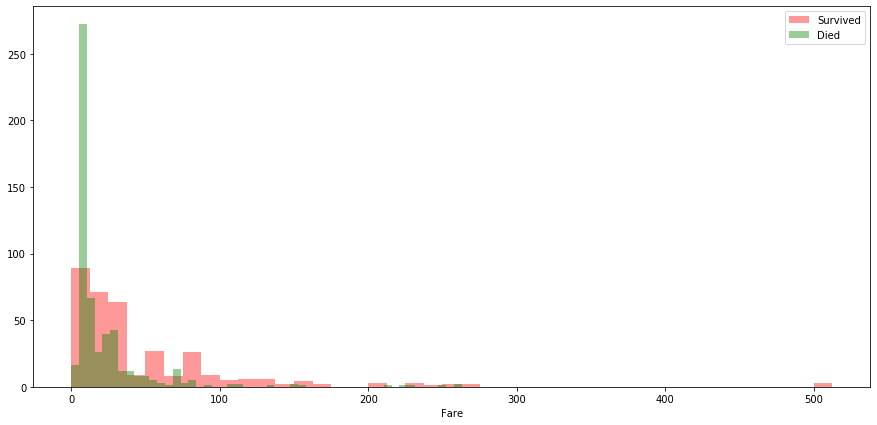

In [45]:
plt.figure(figsize=(15,7))
sns.distplot(train.loc[train.Survived == 1,"Fare"], color="red", kde=False, label="Survived")
sns.distplot(train.loc[train.Survived == 0, "Fare"], color='green', kde=False, label="Dead")
plt.legend(['Survived', 'Died'])
plt.show()

There seems to be the case that passengers who paid more had higher chances of survival. However, since the Fare Variable is continuous and scales signifficantly, it is difficult to analyse. We may have to bin the Fare column into several categories.

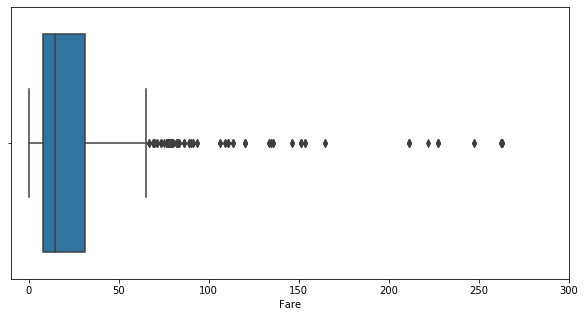

In [46]:
plt.figure(figsize=(10,5))
sns.boxplot(train["Fare"])
plt.xlim(-10,300)
plt.show()

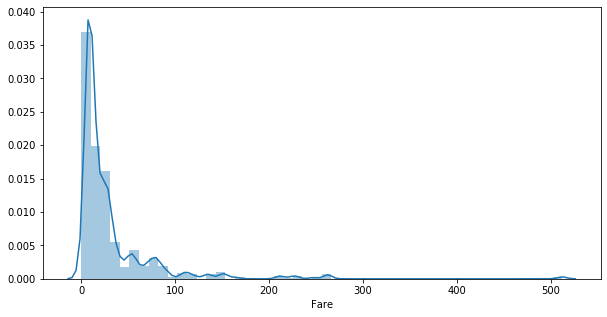

In [47]:
plt.figure(figsize=(10,5))
sns.distplot(train["Fare"])
plt.show()

In [48]:
train.Fare[train.Fare > 70].count()

105

In [49]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

For simplicity, we will bin the Fares into 3 subgroups: Low, Medium, High corresponding to values 0-15, 15-70, 70+

In [50]:
train["Fare_cat"] = 0
train.loc[train.Fare < 15,"Fare_cat"] = 'low'
train.loc[(train.Fare >= 15) & (train.Fare <70), 'Fare_cat'] = 'medium'
train.loc[train.Fare >70, 'Fare_cat'] = 'high'
train.Fare_cat.value_counts()

## Do the same for test set
test.Fare.fillna(test['Fare'].median(), inplace=True)
test.Fare.isna().sum()
test["Fare_cat"] = 0
test.loc[test.Fare < 15,"Fare_cat"] = 'low'
test.loc[(test.Fare >= 15) & (test.Fare <70), 'Fare_cat'] = 'medium'
test.loc[test.Fare >70, 'Fare_cat'] = 'high'
test.Fare_cat.value_counts()

low       216
medium    151
high       51
Name: Fare_cat, dtype: int64

Now let's take a look at survivability based on these newly calculated ranges.

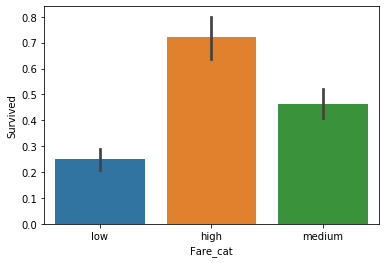

In [51]:
sns.barplot(data=train, x="Fare_cat", y='Survived')

There is clearly a difference between the survivability of the 3 classes, with richer passengers more likely to survive.

#### Cabin

In [52]:
train.Cabin.value_counts(dropna=False)

NaN            687
B96 B98          4
C23 C25 C27      4
G6               4
F33              3
              ... 
C50              1
D49              1
D10 D12          1
A16              1
C104             1
Name: Cabin, Length: 148, dtype: int64

Most of the values in the Cabin column are missing, therefore the column itself is of not much use. However, perhaps the missing values are not due to incomplete data - perhaps some passengers were allocated a cabin, whereas others took what they could find. Let's explore if in that situation, there is any relationship between survivability and Cabin associated / not associated

In [53]:
train["Cabin_assoc"] = [0 if pd.isnull(x) else 1 for x in train['Cabin']]
train["Cabin_assoc"].value_counts()

test["Cabin_assoc"] = [0 if pd.isnull(x) else 1 for x in test['Cabin']]

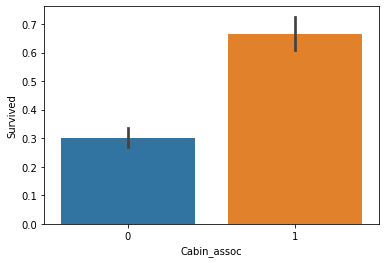

In [54]:
sns.barplot(data=train, x='Cabin_assoc', y='Survived')

Surprisingly enough there seems to be the case that those who do have a cabin associated have a higher survival rate. As such, we shall keep the "Cabin_assoc" column for our analysis.

#### Embarked

In [55]:
train.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [56]:
train.Embarked.fillna("S", inplace=True)
train.Embarked.value_counts(dropna=False)

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [57]:
pivot = pd.pivot_table(data=train, index="Embarked", values=['Survived', 'PassengerId'], aggfunc={"Survived":np.mean, "PassengerId":'count'})
pivot.rename(columns={"PassengerId":"Total Passengers"}, inplace=True)
pivot

Total Passengers  Survived
Embarked                            
C                      168  0.553571
Q                       77  0.389610
S                      646  0.339009

Again, it seems that "where" a passenger embarked also plays a role in their survival chances. 

### Final Data Preparation

Before being able to feed the data into our algorithms, some last modification need to be made. We will drop the redundant columns, and label encode the necessary variables(eq: Sex, Embarked, etc).

In [58]:
train.columns
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Family', 'Family_cat',
       'Fare_cat', 'Cabin_assoc'],
      dtype='object')

In [59]:
dfinal = train[['Survived', 'Pclass', 'Sex', "Age", 'Embarked', 'Title', 'Family_cat', "Fare_cat", "Cabin_assoc"]]
dfinal.head()

Survived  Pclass     Sex   Age Embarked  Title  Family_cat Fare_cat  \
0         0       3    male  22.0        S    Mr.           1      low   
1         1       1  female  38.0        C   Mrs.           1     high   
2         1       3  female  26.0        S  Miss.           0      low   
3         1       1  female  35.0        S   Mrs.           1   medium   
4         0       3    male  35.0        S    Mr.           0      low   

   Cabin_assoc  
0            0  
1            1  
2            0  
3            1  
4            0

In [60]:
test_id = test["PassengerId"]
test = test[['Pclass', "Sex", 'Age', 'Embarked', 'Title', 'Family_cat', 'Fare_cat', 'Cabin_assoc']]
test.head()

Pclass     Sex   Age Embarked Title  Family_cat Fare_cat  Cabin_assoc
0       3    male  34.5        Q   Mr.           0      low            0
1       3  female  47.0        S  Mrs.           1      low            0
2       2    male  62.0        Q   Mr.           0      low            0
3       3    male  27.0        S   Mr.           0      low            0
4       3  female  22.0        S  Mrs.           1      low            0

In [61]:
test['Fare_cat'].value_counts(dropna=False)

low       216
medium    151
high       51
Name: Fare_cat, dtype: int64

In [62]:
from sklearn.preprocessing import LabelEncoder
encod = LabelEncoder()

dfinal['Sex'] = encod.fit_transform(dfinal['Sex'])
dfinal['Embarked'] = encod.fit_transform(dfinal['Embarked'])
dfinal['Title'] = encod.fit_transform(dfinal['Title'])
dfinal['Fare_cat'] = encod.fit_transform(dfinal['Fare_cat'])

dfinal.head()

test['Sex'] = encod.fit_transform(test['Sex'])
test['Embarked'] = encod.fit_transform(test['Embarked'])
test['Title'] = encod.fit_transform(test['Title'])
test['Fare_cat'] = encod.fit_transform(test['Fare_cat'])

H:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
H:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
H:\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [63]:
test.head()

Pclass  Sex   Age  Embarked  Title  Family_cat  Fare_cat  Cabin_assoc
0       3    1  34.5         1      2           0         1            0
1       3    0  47.0         2      3           1         1            0
2       2    1  62.0         1      2           0         1            0
3       3    1  27.0         2      2           0         1            0
4       3    0  22.0         2      3           1         1            0

Let's take a final look at the Age column, and check if we can bin it.

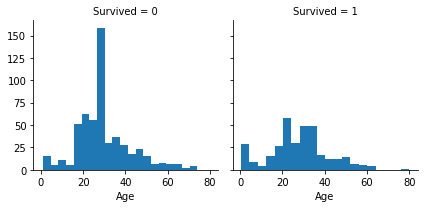

In [64]:
g = sns.FacetGrid(dfinal, col='Survived')
g.map(plt.hist, 'Age', bins=20)

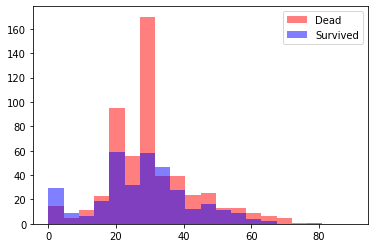

In [65]:

plt.hist(dfinal['Age'][dfinal['Survived']==0], bins = 20, range=(0,90), color='red', alpha = 0.5, label='Dead')
plt.hist(dfinal['Age'][dfinal['Survived']==1], bins=20, range=(0,90), color='blue', alpha=0.5, label='Survived')
plt.legend()
plt.show()

It seems that up until the age of 10, most passengers survived. There seems to be another split between the following ranges, which we will also use: 10-25, 25-35,35+. Let's see how this binning performs.

In [66]:
dfinal['Age_bin'] = 0
dfinal['Age_bin'][dfinal['Age'] <= 10] = 0
dfinal['Age_bin'][(dfinal['Age']>10) & (dfinal['Age'] <= 25)] = 1
dfinal['Age_bin'][(dfinal['Age']>25) & (dfinal['Age'] <= 35)] = 2
dfinal['Age_bin'][(dfinal['Age']>35)] = 3

test['Age_bin'] = 0
test['Age_bin'][test['Age'] <= 10] = 0
test['Age_bin'][(test['Age']>10) & (dfinal['Age'] <= 25)] = 1
test['Age_bin'][(test['Age']>25) & (dfinal['Age'] <= 35)] = 2
test['Age_bin'][(test['Age']>35)] = 3

H:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
H:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
H:\anaconda\lib\site-packages\pandas\core\generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_d

In [67]:
dfinal['Age_bin'].value_counts()

2    332
1    273
3    218
0     68
Name: Age_bin, dtype: int64

In [68]:
dfinal[['Age_bin', 'Survived']].groupby('Age_bin').mean()

Survived
Age_bin          
0        0.588235
1        0.395604
2        0.334337
3        0.380734

There seems to be a signifficant survivability between the  4 bins, so we will keep them in the model, and drop the Age column.

In [69]:
try:
    dfinal.drop(['Age'], axis = 1,inplace=True)
except:
    pass
dfinal.head()

H:\anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Survived  Pclass  Sex  Embarked  Title  Family_cat  Fare_cat  Cabin_assoc  \
0         0       3    1         2      2           1         1            0   
1         1       1    0         0      3           1         0            1   
2         1       3    0         2      1           0         1            0   
3         1       1    0         2      3           1         2            1   
4         0       3    1         2      2           0         1            0   

   Age_bin  
0        1  
1        3  
2        2  
3        2  
4        2

In [70]:
try:
    test.drop(['Age'], axis=1, inplace=True)
except:
    pass
test.head()

Pclass  Sex  Embarked  Title  Family_cat  Fare_cat  Cabin_assoc  Age_bin
0       3    1         1      2           0         1            0        2
1       3    0         2      3           1         1            0        3
2       2    1         1      2           0         1            0        3
3       3    1         2      2           0         1            0        2
4       3    0         2      3           1         1            0        0

In [71]:
dfinal_X = dfinal.drop(['Survived'], axis=1)
dfinal_y = dfinal['Survived']

### Modelling

For the purpose of this analysis, several widely used models will be selected and analysed, such as:
- Logistic Regression
- K Nearest Neighbours
- Decision Trees
- Support Vector Machines


In [72]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

models = [
    linear_model.LogisticRegression(),
    neighbors.KNeighborsClassifier(),
    svm.SVC(probability=True),
    tree.DecisionTreeClassifier()
]

In [73]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
cv = KFold(n_splits=10, random_state = 1, shuffle=True)
## We will
for model in models:
    scores = cross_val_score(model, dfinal_X, dfinal_y, scoring='accuracy', cv=cv, n_jobs = -1)
    print(model.__class__.__name__, scores.mean())
print('\n')
    
#for model in models:
 #   scores = cross_validate(model, dfinal_X, dfinal_y, scoring='accuracy', cv=cv, n_jobs=-1, return_train_score=True)
  #  print(scores['train_score'].mean())

LogisticRegression 0.8024843945068664
KNeighborsClassifier 0.789063670411985
SVC 0.8283645443196004
DecisionTreeClassifier 0.795792759051186




Now before any hyperparameter tuning was done, it looks like Support Vector Machine is the best algorithm. Let's check out if we can improve on these models with some parameter tuning. For this task we will be using GridSearchCV function.

In [74]:
from sklearn.model_selection import GridSearchCV
score_df = pd.DataFrame(columns=["Name", 'Score'])
idx = 0

In [75]:
## Logistic Regression
param_grid = {"C":[1.0, 0.5, 0.2, 0.1],
              "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag','saga']
    
}

logistic = GridSearchCV(models[0], param_grid = param_grid, cv=cv).fit(dfinal_X, dfinal_y)
logistic.best_score_
logistic_estimator = logistic.best_estimator_
score_df.loc[idx,'Name'] = "Logistic Regression"
score_df.loc[idx,'Score'] = logistic.best_score_

In [76]:
idx += 1
## K Neighbors Classifier
param_grid = {"n_neighbors":[2,3,5,10,15,25],
             "weights":['uniform','distance'],
             }
neighbors = GridSearchCV(models[1], param_grid = param_grid, cv=cv).fit(dfinal_X, dfinal_y)
neighbors_estimator = neighbors.best_estimator_
score_df.loc[idx,'Name'] = "K Neighbors Classifier"
score_df.loc[idx,'Score'] = neighbors.best_score_

In [77]:
idx+=1
## SVC
param_grid = {"C":[1,2,5,10],
              "kernel":['linear','poly','sigmoid','rbf'],
              "degree":[2,3,4,5]}
SVC = GridSearchCV(models[2], param_grid = param_grid, cv=cv).fit(dfinal_X, dfinal_y)
SVC_estimator = SVC.best_estimator_
score_df.loc[idx,'Name'] = 'Support Vector Machines'
score_df.loc[idx,'Score'] = SVC.best_score_

In [78]:
idx += 1
## Decision Tree
param_grid = {"criterion":['gini', 'entropy'],
             "max_depth":[2,3,4,5,7,10],
             "min_samples_split":[2,5,10,15]}
treee = GridSearchCV(models[3], param_grid = param_grid, cv=cv).fit(dfinal_X, dfinal_y)
tree_estimator = treee.best_estimator_
score_df.loc[idx,'Name'] = 'Decision Tree'
score_df.loc[idx,'Score'] = treee.best_score_

In [79]:
score_df

Name     Score
0      Logistic Regression  0.802484
1   K Neighbors Classifier  0.809288
2  Support Vector Machines  0.833995
3            Decision Tree   0.82387

In [80]:
tree_estimator

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [81]:
SVC_estimator

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

Since the model that best performed on our training data set is the SVM one, this is the one that we will use on the test set.

In [82]:
y_predict = SVC_estimator.predict(test)
y_predict1 = tree_estimator.predict(test)

In [83]:
final = pd.DataFrame()
final['PassengerId'] = test_id
final['Survived'] = y_predict1

In [85]:
final.set_index("PassengerId", inplace=True)
final.to_csv("titanic.csv")

In [86]:
final

Survived
PassengerId          
892                 0
893                 0
894                 0
895                 0
896                 0
...               ...
1305                0
1306                1
1307                0
1308                0
1309                1

[418 rows x 1 columns]

Both choices (SVC and DecisionTree) yielded similar accuracy scores on Kaggle (0.77), which is just 1% better than the baseline (assuming all females live, all males die). This is a pretty embarrasing score for this many lines of code. As such we must revisit the feature engineering section to check which variables we may process differently.